In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input,BatchNormalization,Activation,add
from keras.models import Model
import pandas as pd
import sklearn

# 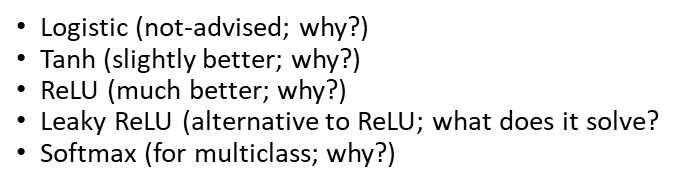

sigmoid and TanH all have problem of information loss due to the derivative having a short range. relu is a very fast activation function due to efficient computation but could lead to undesirable neuron deactivation which can be addressed by leaky relu. softmax outputs one-hot-vector which is great for multiclass classification.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
def ResNet(input,n_filters):
  if input.shape[-1] == n_filters:
    merge_input = input
  else:
    merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(input)
  # conv1
  conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(input)
  # bn1
  bn1 = BatchNormalization(momentum=0.9)(conv1)
  act_bn1 = Activation('relu')(bn1)
  # conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(act_bn1)
  # bn2
  bn2 = BatchNormalization(momentum=0.9)(conv2)
  act_bn2 = Activation('relu')(bn2)
  # merge
  output = add([act_bn2, merge_input])
  output = Activation('relu')(output)
  return output

visible = Input(shape=(32,32,3))
layer1 = ResNet(visible, 64)
layer2 = ResNet(layer1, 64)
layer3 = ResNet(layer2, 64)
layer4 = ResNet(layer3, 64)
layer5 = ResNet(layer4, 64)
flatten_layer = Flatten()(layer5)
output_layer = Dense(32,activation='softmax')(flatten_layer)
model = Model(inputs=visible, outputs=output_layer)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 32, 32, 64)   1792        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 32, 32, 64)   256         conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_45 (Activation)      (None, 32, 32, 64)   0           batch_normalization_30[0][0]     
____________________________________________________________________________________________

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 2976s 2s/step - loss: 815.8530 - accuracy: 0.3011
Epoch 2/5
1563/1563 [==============================] - 3004s 2s/step - loss: 34.8477 - accuracy: 0.5301
Epoch 3/5
1563/1563 [==============================] - 3023s 2s/step - loss: 12.5484 - accuracy: 0.5938
Epoch 4/5
1563/1563 [==============================] - 2999s 2s/step - loss: 6.6768 - accuracy: 0.6497
Epoch 5/5
1563/1563 [==============================] - 2981s 2s/step - loss: 3.8989 - accuracy: 0.7026


# 2. Show how Backpropagation in Time, and Deep Neural Networks both lead to potential training issues as per the discussion in the lecture.

In RNN, to compute backpropagation for h[k] requires repeatedly multiplication of tunable factor for h[k] to h[k+1].

$\overline{h[k]}=⋯u^{T-k} φ_h'(z[T])…φ_h'(z[k+1])\overline{h[T]}$

In this case, we generate a strong amplification or diminishing to the gradient which lead to instability.


On the other hand, very deep neural network create heavy computational stress for the optimizer to find the best parameters. Therefore, when there are more parameters than we need to model a phenomenon, with limited iterations and data, the optimizer may not be able to deactivate the extra layers.

for example, if k hidden layers are enough for a problem A, then best output with lowest error would be the output of $h_k$. There is no way that the optimizser could tune the best parameters $w_{k},w_{k+1},...w_{n}$ so that the output of $h_k$ would keep exactly the same information after operations of $h_{k+1},h_{k+2},...,h_{n}$. 


# 3. Take a simple MLP-3 that you have developed in a prior assignment. Add two additional layers to this MLP-3 and train the resulting MLP-5. Note the characteristics of the training process (number of iterations, error per iteration).

# Now implement a skip connection from the MLP-3 output to the final ALC in the MLP-5. Retrain this and note the characteristics of training.

# Perform this activity twice more (MLP-7, and then MLP-9) noting the above.

# Report the training traces, and comment on what you see.

(200, 2)

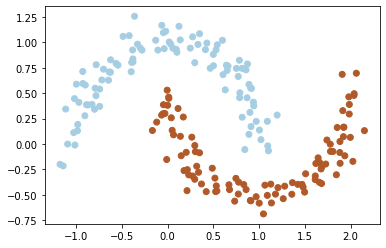

In [ ]:
from sklearn.datasets import make_moons
data = make_moons(200,noise=0.1)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap=plt.cm.Paired)
data[0].shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[0],data[1],test_size=0.5,random_state=1)


In [ ]:
def mlp3(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  output = Dense(1,activation="sigmoid")(dense1)
  return output
visible = Input((2,))
output_layer = mlp3(50,visible)
model3 = Model(inputs=visible, outputs=output_layer)
model3.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
history3 = model3.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7646
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7630
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7764
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8304
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8054
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7794
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8073
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.7988
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8266
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8547
Epoch 11/20
4/4 [======================

In [ ]:
x_test_scaled = scaler.transform(x_test)
model3.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8700


[0.2881069481372833, 0.8700000047683716]

In [ ]:
def mlp5(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  output = Dense(1,activation="sigmoid")(dense3)
  return output
visible = Input((2,))
output_layer = mlp5(50,visible)
model5 = Model(inputs=visible, outputs=output_layer)
model5.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history5 = model5.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.8082 - accuracy: 0.5123
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4936
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.5907
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7132
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7356
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7839
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7775
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7723
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7877
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8157
Epoch 11/20
4/4 [======================

In [ ]:
model5.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8600


[0.3119848966598511, 0.8600000143051147]

In [ ]:
def mlp5_res(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  addition = add([dense3,dense1])
  output = Dense(1,activation="sigmoid")(addition)
  return output
visible = Input((2,))
output_layer = mlp5_res(50,visible)
model5_res = Model(inputs=visible, outputs=output_layer)
model5_res.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history5_res = model5_res.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.5130
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.6381
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7439
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7811
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.7748
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8004
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8280
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8020
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8268
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8412
Epoch 11/20
4/4 [======================

In [ ]:
model5_res.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8900


[0.26444610953330994, 0.8899999856948853]

In [ ]:
def mlp7(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  dense4 = Dense(depth,activation="relu")(dense3)
  dense5 = Dense(depth,activation="relu")(dense4)
  output = Dense(1,activation="sigmoid")(dense5)
  return output
visible = Input((2,))
output_layer = mlp7(50,visible)
model7 = Model(inputs=visible, outputs=output_layer)
model7.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history7 = model7.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.7459 - accuracy: 0.3525
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4585
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5283
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.7495
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7867
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.8303
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.8391
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.8235
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.8683
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8339
Epoch 11/20
4/4 [======================

In [ ]:
model7.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8600


[0.37298813462257385, 0.8600000143051147]

In [ ]:
def mlp7_res(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  dense4 = Dense(depth,activation="relu")(dense3)
  dense5 = Dense(depth,activation="relu")(dense4)
  addition = add([dense5,dense1])
  output = Dense(1,activation="sigmoid")(addition)
  return output
visible = Input((2,))
output_layer = mlp7_res(50,visible)
model7_res = Model(inputs=visible, outputs=output_layer)
model7_res.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history7_res = model7_res.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 1.1849 - accuracy: 0.5054
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.9757 - accuracy: 0.5012
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.5095
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.4795
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.5030
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.5075
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.5834
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7662
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.8065
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8127
Epoch 11/20
4/4 [======================

In [ ]:
model7_res.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8800


[0.2772095799446106, 0.8799999952316284]

In [ ]:
def mlp9(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  dense4 = Dense(depth,activation="relu")(dense3)
  dense5 = Dense(depth,activation="relu")(dense4)
  dense6 = Dense(depth,activation="relu")(dense5)
  dense7 = Dense(depth,activation="relu")(dense6)
  output = Dense(1,activation="sigmoid")(dense7)
  return output
visible = Input((2,))
output_layer = mlp9(50,visible)
model9 = Model(inputs=visible, outputs=output_layer)
model9.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history9 = model9.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5582
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5288
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6798
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.7767
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.8032
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.8185
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.8023
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.8289
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.8393
Epoch 10/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.8216
Epoch 11/20
4/4 [======================

In [ ]:
model9.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.8700


[0.5677650570869446, 0.8700000047683716]

In [ ]:
def mlp9_res(depth,input):
  dense1 = Dense(depth,activation="relu",kernel_initializer='he_uniform')(input)
  dense2 = Dense(depth,activation="relu")(dense1)
  dense3 = Dense(depth,activation="relu")(dense2)
  dense4 = Dense(depth,activation="relu")(dense3)
  dense5 = Dense(depth,activation="relu")(dense4)
  dense6 = Dense(depth,activation="relu")(dense5)
  dense7 = Dense(depth,activation="relu")(dense6)
  addition = add([dense7,dense1])
  output = Dense(1,activation="sigmoid")(addition)
  return output
visible = Input((2,))
output_layer = mlp9_res(50,visible)
model9_res = Model(inputs=visible, outputs=output_layer)
model9_res.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history9_res = model9_res.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.9699 - accuracy: 0.4800
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.8074 - accuracy: 0.5709
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5738
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.5891
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.5970
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.6320
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.6791
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.6793
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.6915
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7833
Epoch 11/20
4/4 [======================

In [ ]:
model9_res.evaluate(x_test_scaled,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.8800


[0.28168949484825134, 0.8799999952316284]

Text(0.5, 1.0, 'training error each epochs')

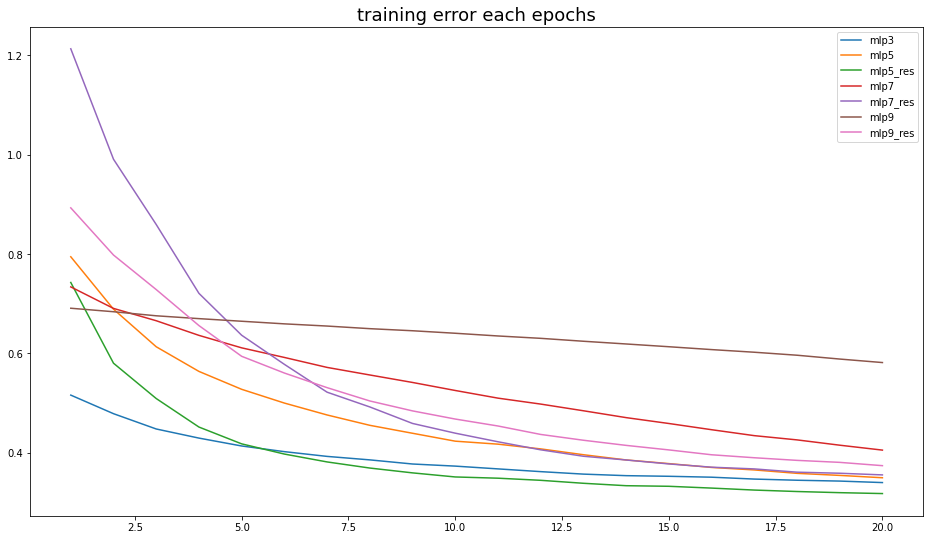

In [ ]:
plt.plot(np.arange(1,21),history3.history["loss"])
plt.plot(np.arange(1,21),history5.history["loss"])
plt.plot(np.arange(1,21),history5_res.history["loss"])
plt.plot(np.arange(1,21),history7.history["loss"])
plt.plot(np.arange(1,21),history7_res.history["loss"])
plt.plot(np.arange(1,21),history9.history["loss"])
plt.plot(np.arange(1,21),history9_res.history["loss"])
plt.legend(loc='upper right', labels=['mlp3', 'mlp5', 'mlp5_res', "mlp7", "mlp7_res", "mlp9", "mlp9_res"])
plt.title("training error each epochs",fontsize = 18)

Text(0.5, 1.0, 'training error each epochs')

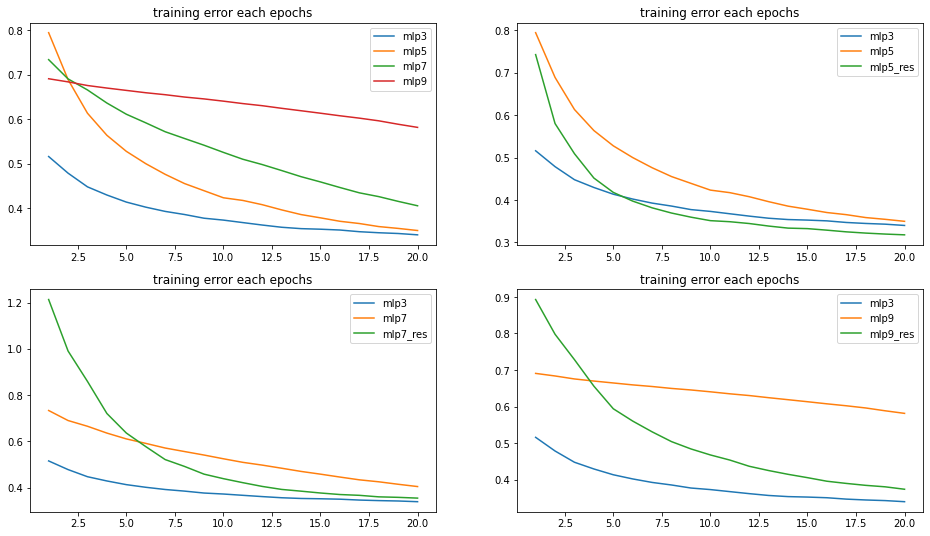

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.title("training error each epochs",fontsize = 18)
plt.subplot(221)
plt.plot(np.arange(1,21),history3.history["loss"])
plt.plot(np.arange(1,21),history5.history["loss"])
plt.plot(np.arange(1,21),history7.history["loss"])
plt.plot(np.arange(1,21),history9.history["loss"])
plt.legend(loc='upper right', labels=['mlp3', 'mlp5',  "mlp7",  "mlp9", ])
plt.title("training error each epochs",fontsize = 12)
plt.subplot(222)
plt.plot(np.arange(1,21),history3.history["loss"])
plt.plot(np.arange(1,21),history5.history["loss"])
plt.plot(np.arange(1,21),history5_res.history["loss"])
plt.legend(loc='upper right', labels=['mlp3', 'mlp5', 'mlp5_res'])
plt.title("training error each epochs",fontsize = 12)
plt.subplot(223)
plt.plot(np.arange(1,21),history3.history["loss"])
plt.plot(np.arange(1,21),history7.history["loss"])
plt.plot(np.arange(1,21),history7_res.history["loss"])
plt.legend(loc='upper right', labels=['mlp3',  "mlp7", "mlp7_res",])
plt.title("training error each epochs",fontsize = 12)
plt.subplot(224)
plt.plot(np.arange(1,21),history3.history["loss"])
plt.plot(np.arange(1,21),history9.history["loss"])
plt.plot(np.arange(1,21),history9_res.history["loss"])
plt.legend(loc='upper right', labels=['mlp3', "mlp9", "mlp9_res"])
plt.title("training error each epochs",fontsize = 12)